In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

plt.rcParams["font.family"] = "sans-serif"

In [2]:
cd = "C://Users//scottjmk//Dropbox//Research//petra_moser//"

df1 = pd.read_csv(cd+"Replication//Data//MoS1956/MoS1956_Final.csv")
df1 = df1[["unique_id", "firstname", "middlename", "lastname", "birthyear", "gender_clean", "child", "cluster", "see"]]

cluster = pd.read_csv(cd+"Replication//Data//Miscellaneous/Field_Volume1.csv")
cluster = cluster[["unique_id", "title"]]

df2 = pd.merge(df1, cluster, on = "unique_id", how = "outer")

def reorderLegend(ax=None,order=None,unique=False):
    if ax is None: ax=plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    if order is not None:
        keys=dict(zip(order,range(len(order))))
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t,keys=keys: keys.get(t[0],np.inf)))
    if unique:  labels, handles= zip(*unique_everseen(zip(labels,handles), key = labels)) # Keep only the first of each handle
    ax.legend(handles, labels)
    return(handles, labels)

df3 = df2[df2["gender_clean"]!="unknown"][~df2["birthyear"].isnull()][df2["see"].isnull()][~df2["cluster"].isnull()]

fathers = df3[df3["gender_clean"] == "male"][~df3["child"].isnull()]
other_men = df3[df3["gender_clean"] == "male"][df3["child"].isnull()]
mothers = df3[df3["gender_clean"] == "female"][~df3["child"].isnull()]
other_women = df3[df3["gender_clean"] == "female"][df3["child"].isnull()]

fathers_fields = fathers.groupby("title").size().reset_index().rename(columns = {0: "fathers"}).sort_values(by = "title")
other_men_fields = other_men.groupby("title").size().reset_index().rename(columns = {0: "other_men"}).sort_values(by = "title")
mothers_fields = mothers.groupby("title").size().reset_index().rename(columns = {0: "mothers"}).sort_values(by = "title")
other_women_fields = other_women.groupby("title").size().reset_index().rename(columns = {0: "other_women"}).sort_values(by = "title")

df4 = pd.merge(mothers_fields, other_women_fields, on = "title", how = "outer")
df4 = pd.merge(df4, fathers_fields, on = "title", how = "outer")
df4 = pd.merge(df4, other_men_fields, on = "title", how = "outer")

df4.replace(np.nan, 0.0, inplace = True)
df4.replace("Mechanical engineering (control)", "Mechanical engineering", inplace = True)

df4["women"] = df4["mothers"] + df4["other_women"]
df4["men"] = df4["fathers"] + df4["other_men"]

df4["mothers_share"] = 100*df4["mothers"] / df4["mothers"].sum()
df4["other_women_share"] = 100*df4["other_women"] / df4["other_women"].sum()
df4["women_share"] = 100*df4["women"] / df4["women"].sum()

df4["fathers_share"] = 100*df4["fathers"] / df4["fathers"].sum()
df4["other_men_share"] = 100*df4["other_men"] / df4["other_men"].sum()
df4["men_share"] = 100*df4["men"] / df4["men"].sum()

df4

C:\Users\scottjmk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,9,16,17,18,19,27,28,34,52,53,56,57,60,61,65,68,69,108,109,112,113,116,117,120,121,124,125,128,129,172,176,177,180,181,184,185,189,193,197,201,205,209,213,217,221,225,229,233,237,241,356,360,361,364,365,368,369,372,373,376,377,380,381,384,385,388,389,392,393,396,397,400,401,404,405,408,409,412,413,416,417,420,421,424,425,428,429,432,433,436,437,441,445,449,453,457,461,465,469,472,473,477,480,481,484,485,488,489,492,493,534,535,536,537,538,539,575,576,579,580,583,584,587,588,644,648,651,652,655,656,659,660,663,667,671,675,679,727,728,731,732,735,736,739,740,743,744,747,748,751,752,755,756,759,760,763,764,767,768,771,772,775,776,779,780,783,784,787,788,791,792,795,799,800,803,804,807,808,811,819,820,821,822,823,824,825,826,827,828,843,844,845,846,847,865,898,899,900,901,912,913,914,915,916,917,928,929,930,931,932,933,934,936,937,938,939,940,941,942,943,944,969,970,971,972,973,974,

,title,mothers,other_women,fathers,other_men,women,men,mothers_share,other_women_share,women_share,fathers_share,other_men_share,men_share
0,Absorption spectroscopy,6.0,16.0,202,62,22.0,264,2.380952,1.739130,1.877133,0.782067,0.741006,0.772020
1,Adsorption,1.0,16.0,684,252,17.0,936,0.396825,1.739130,1.450512,2.648186,3.011832,2.737162
2,Alkaloid,1.0,4.0,123,58,5.0,181,0.396825,0.434783,0.426621,0.476209,0.693199,0.529302
3,Amino acid,3.0,20.0,235,72,23.0,307,1.190476,2.173913,1.962457,0.909830,0.860523,0.897766
4,Benzene,4.0,8.0,359,124,12.0,483,1.587302,0.869565,1.023891,1.389911,1.482013,1.412446
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Lubricant,0.0,0.0,102,16,0.0,118,0.000000,0.000000,0.000000,0.394905,0.191227,0.345070
96,Mass transfer,0.0,0.0,299,66,0.0,365,0.000000,0.000000,0.000000,1.157614,0.788813,1.067376
97,Mining,0.0,0.0,111,32,0.0,143,0.000000,0.000000,0.000000,0.429750,0.382455,0.418178
98,Stainless steelÊ,0.0,0.0,114,24,0.0,138,0.000000,0.000000,0.000000,0.441364,0.286841,0.403556


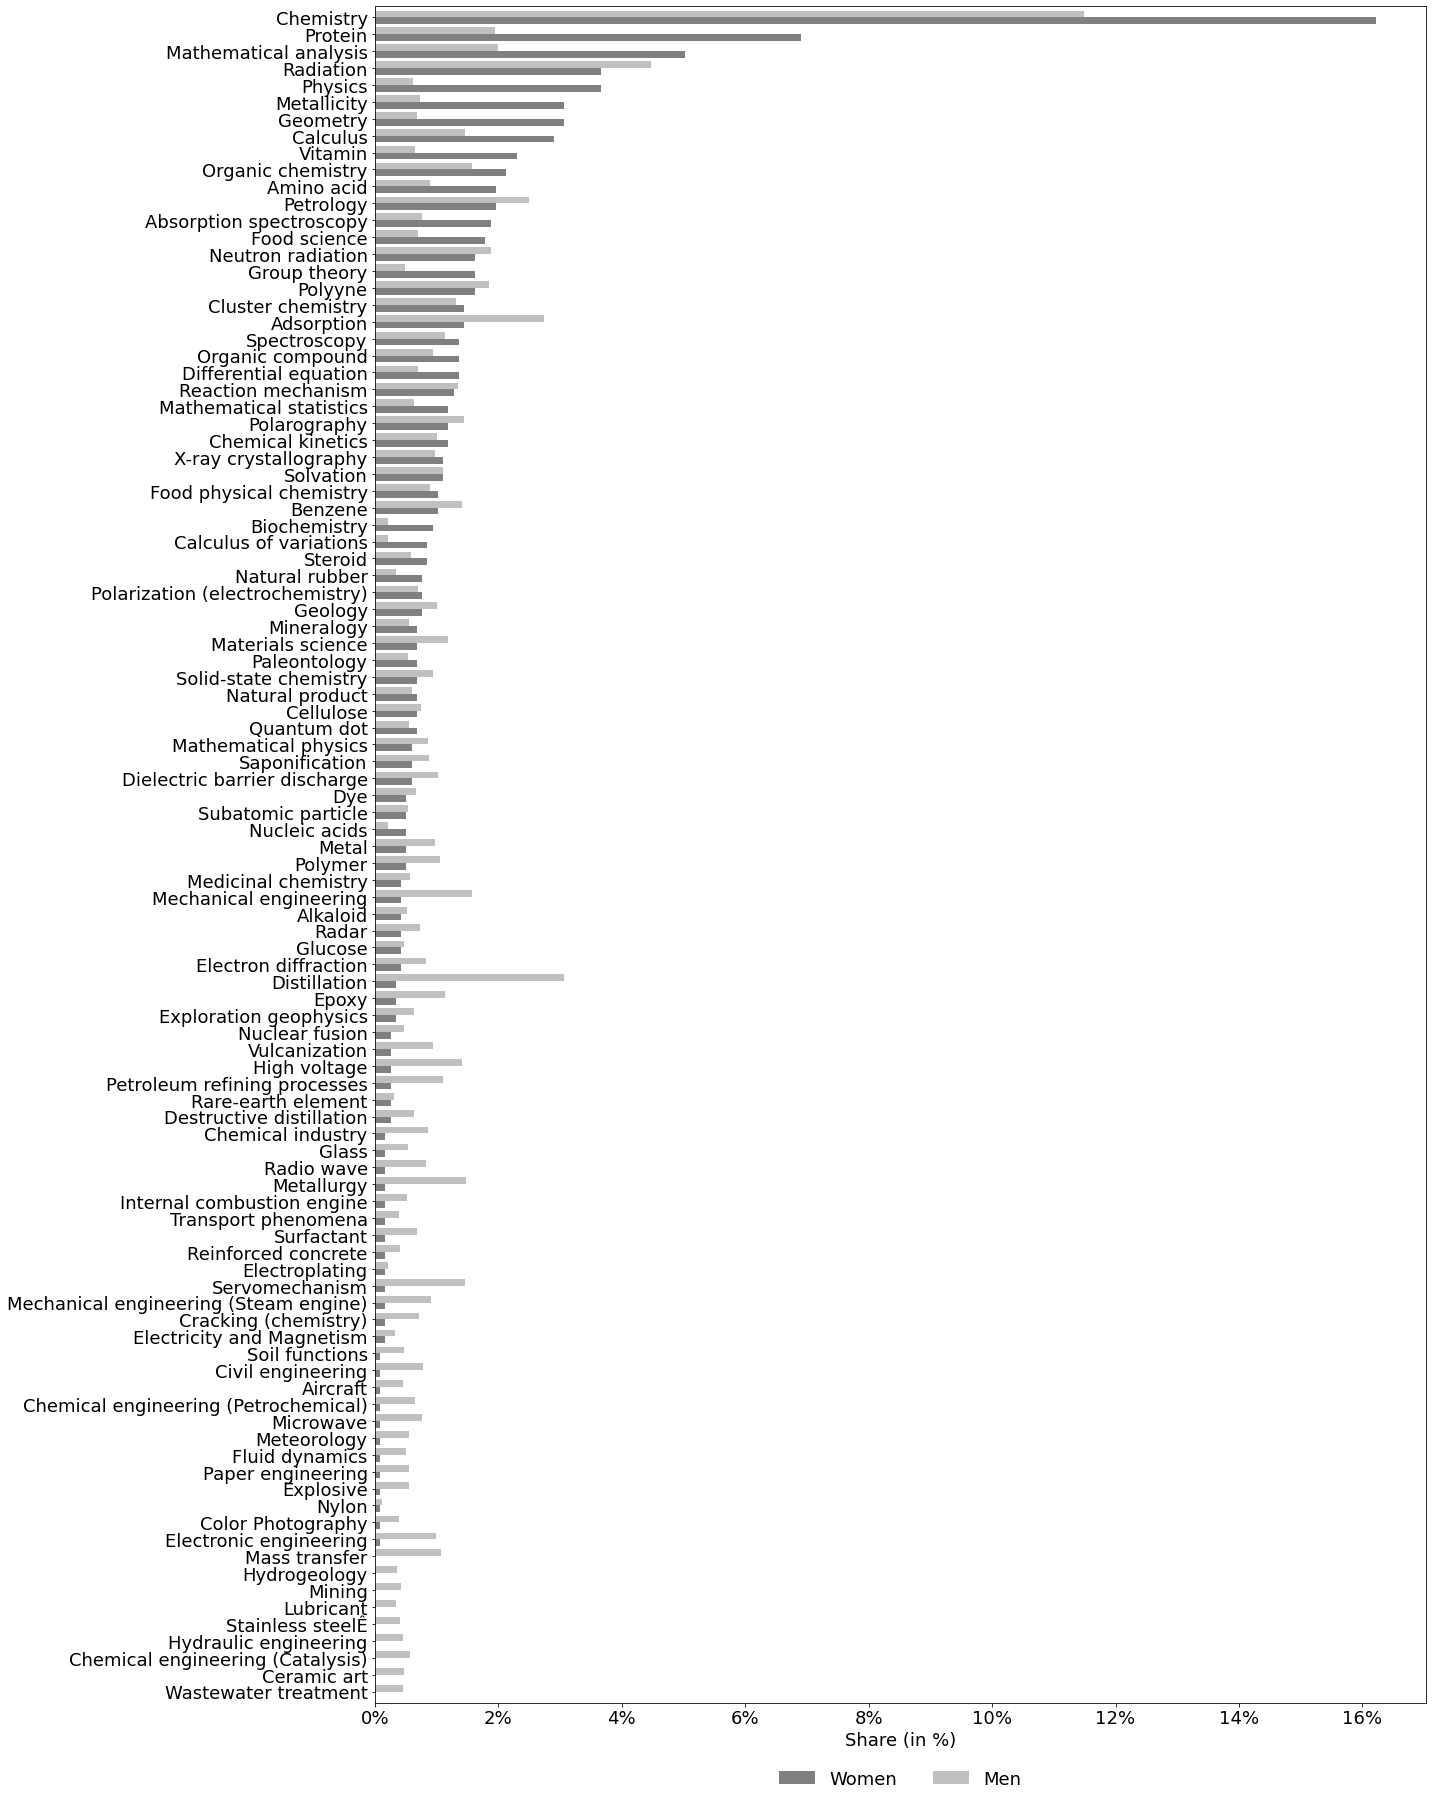

In [3]:
fig, ax = plt.subplots(figsize = (20, 25))
df4[["title", "women_share", "men_share"]].sort_values(by = "women_share", ascending = False).rename(columns = {"women_share": "Women", 
        "men_share": "Men"}).sort_values(by = "Women").plot.barh(ax = ax, 
        x = "title", color = ["gray", "silver"], width = 0.8)
plt.title("")
plt.xlabel("Share (in %)", fontsize = 18)
plt.ylabel("", fontsize = 18)
ax.legend(loc = "upper center", bbox_to_anchor = (0.5, -0.03), ncol = 3, frameon = False, fontsize = 18)

plt.xticks(fontsize = 18, rotation = 0)
plt.yticks(fontsize = 18, rotation = 0)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0.1))

fig.tight_layout()

plt.savefig(cd+"Replication//Output//Figures/FigureA8.jpg", transparent=False, bbox_inches="tight")